# Classification model to predict whether an asteroid is hazardous

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#Compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=10, batch_size=64)

Epoch 1/10
10253/10253 [==============================] - 58s 5ms/step - loss: 0.0069 - accuracy: 0.9974
Epoch 2/10
10253/10253 [==============================] - 55s 5ms/step - loss: 0.0056 - accuracy: 0.9976
Epoch 3/10
10253/10253 [==============================] - 60s 6ms/step - loss: 0.0053 - accuracy: 0.9977
Epoch 4/10
10253/10253 [==============================] - 59s 6ms/step - loss: 0.0052 - accuracy: 0.9978
Epoch 5/10
10253/10253 [==============================] - 56s 6ms/step - loss: 0.0051 - accuracy: 0.9978
Epoch 6/10
10253/10253 [==============================] - 56s 6ms/step - loss: 0.0051 - accuracy: 0.9978
Epoch 7/10
10253/10253 [==============================] - 58s 6ms/step - loss: 0.0051 - accuracy: 0.9978
Epoch 8/10
10253/10253 [==============================] - 58s 6ms/step - loss: 0.0050 - accuracy: 0.9978
Epoch 9/10
10253/10253 [==============================] - 56s 6ms/step - loss: 0.0050 - accuracy: 0.9979
Epoch 10/10
10253/10253 [==============================

In [ ]:
# Evaluating
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

5127/5127 [==============================] - 9s 2ms/step


In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 1.00
Precision: 0.79
Recall: 0.29
F1 Score: 0.43
ROC AUC Score: 0.65


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

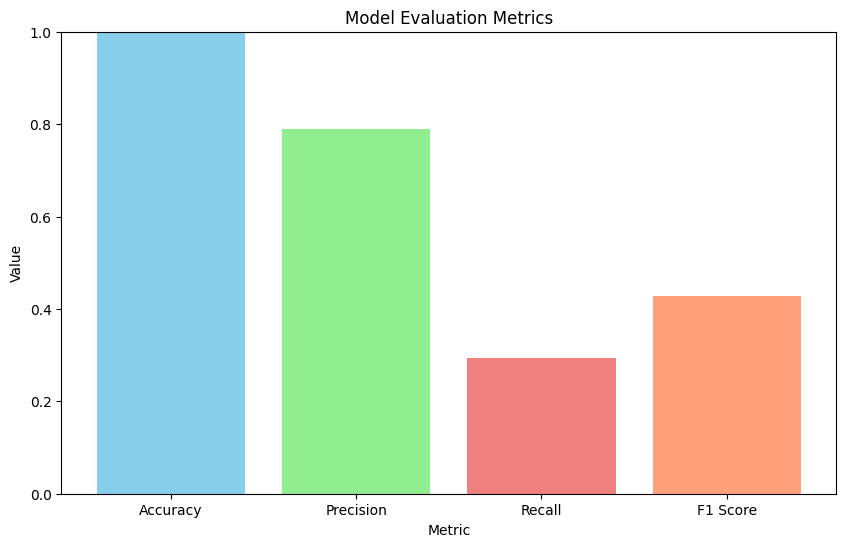

In [ ]:
# Ploting accuracy, precision, recall, and F1-score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.show()

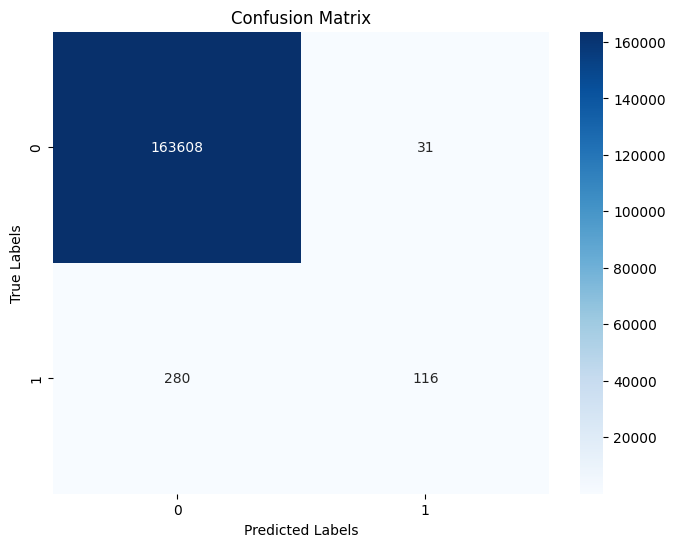

In [ ]:
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()